<img style="float: left;" src="LectureUQ/Slide1.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide2.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide3.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide4.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide5.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide6.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide7.PNG" width="100%">

<img style="float: left;" src="LectureUQ/Slide8.PNG" width="100%">

## <span style="color:red">Exercise 1: Uncertainties in geothermal production</span>

## Consider geothermal production from reservoir filled with water:
 * Depth of reservoir: 2000 m
 * Tickness of reservoir: 80 m
 * Porosity: 20%
 * Well separation is 800 m 
 * Production rate is 1000 m3/day
 * Permeability 50 mDarcy
 * Injection temperature T = 20 C
 * Well radius r = 0.15 m
 
Uncertain parameters: porosity, initial temperature and brine density

#### 1. Evaluate uncertainties in total energy production

#### 2. Evaluate uncertainties in pumping energy

<img style="float: left;" src="Lecture/Slide3.PNG" width="100%">

In [1]:
# 1 PJ = 1e12 kJ
from math import pi
import numpy as np

phi = 0.20
T_ini = 75 # or you can calculate based on the thermal gradient
rho_w = 975 # kg/m3
k   = 1e-12 * (0.01 + 3.2*phi**3 / (1-phi)**2)
Q = 1000

def Energy_evaluation(Q, phi, T_ini, rho_w, k):
    h = 80

    temp_inj = 20
    rho_r = 2500 # kg/m3
    C_w = 4   # kJ/kg/C
    C_r = 0.8532  # kJ/kg/C

    mu = 8.9e-4
    rw = 0.15   # m

    nu = 0.4

    day2sec = 86400
    energy_per_year = 0.1 * 1e15 # PJ to J


    l = 800  # well distance

    E = rho_w*C_w*(T_ini-temp_inj) # KJ/m3

    A = 400*80

    v = rho_w * C_w * Q / (rho_r * C_r * (1-phi) * A) # velocity m/day

    lt = l / v # m/day

    WI = 2 * np.pi * k * h / np.log(l/2/rw) / mu

    dp = Q / day2sec / WI / 1000 # pressure drop in kPa

    Ep = dp * Q / day2sec / nu # pumpimg energy in KJ/sec

    E_prod = lt * Q * E * 1e-12 # total PJ
    E_pump = lt * Ep * day2sec * 1e-12 # total PJ
    
    return E_prod, E_pump, lt

e1, e2, lt = Energy_evaluation(Q, phi, T_ini, rho_w, k)
    
    
print('Lifetime     = ' + str(lt/365) + ' years')
print('Prod. energy = ' + str(e1) + ' PJ')
print('Pump energy  = ' + str(e2) + ' PJ')

Lifetime     = 30.687629083245522 years
Prod. energy = 2.4026112 PJ
Pump energy  = 0.0905381669717522 PJ


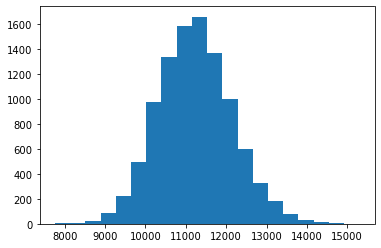

In [12]:
import matplotlib.pyplot as plt

n_sample = 10000

phi = np.random.normal(20, 5, size=n_sample) / 100
k   = 1e-12 * (0.01 + 3.2*phi**3 / (1-phi)**2)
T_ini = np.random.normal(70, 10, size=n_sample)
rho_w = np.random.normal(975, 50, size=n_sample)

e1, e2, lt = Energy_evaluation(Q, phi, T_ini, rho_w, k)

plt.hist(lt, 20)
plt.show()

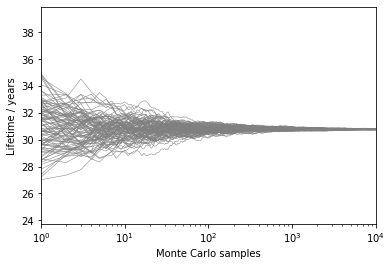

In [13]:

n_MC = 100
e_pump = []
e_prod = []

for m in range(0, n_MC):
    
    phi = np.random.normal(20, 5, size=n_sample) / 100
    k   = 1e-12 * (0.01 + 3.2*phi**3 / (1-phi)**2)
    T_ini = np.random.normal(70, 10, size=n_sample)
    rho_w = np.random.normal(975, 50, size=n_sample)
    
    e1, e2, lt = Energy_evaluation(Q, phi, T_ini, rho_w, k)
    
    lt_cumsum = np.cumsum(lt/365)
    lt_average = lt_cumsum/(np.arange(1, n_sample+1))
    
    plt.plot(lt_average, '-', c='gray', linewidth=0.5)
    
plt.xscale('log')
plt.xlim([1, n_sample])
plt.xlabel('Monte Carlo samples')
plt.ylabel('Lifetime / years')
plt.show()

In [ ]:
e_prod = np.reshape(e_prod, n_MC * n_sample)
e_pump = np.reshape(e_pump, n_MC * n_sample)

plt.figure(num=2, figsize=(12,4))
plt.subplot(121)
plt.hist(e_prod, 30)
plt.subplot(122)
plt.hist(e_pump, 30)
plt.show()

## <span style="color:red">Exercise 2: Uncertainties in CO2 sequestration</span>

#### Consider CO2 injection to water reservoir
 * Depth of reservoir: 2000 m
 * Area of reservoir: 4 by 4 km 
 * Tickness of reservoir: 200 m
 * Initial pressure: 200 bars
 * Porosity: 20%
 * Rock compressibility: $10^{-5}$ 1/bar
 * Yearly CO2 rate: 100 Mm$^3$
 * Uplift limit: 20 cm
 
Uncertain parameters: reservoir dimensions, initial temperature and injection rate

#### 1. Evaluate uncertainties in total mass injected


<img style="float: left;" src="Lecture_flow1/Slide12.PNG" width="100%">

In [2]:
import numpy as np
def props(component, params):
    properties = [["C1",    "CO2",   "N2",    "H2S",   "C2",    "C3"],       # component
                  [190.58,  304.10,  126.20,  373.53,  305.32,  369.8],  # T_c [K]
                  [46.04,   73.75,   34.00,   89.63,   48.72,   42.45],       # p_c [bar]
                  [0.012,   0.239,   0.0377,  0.0942,  0.0995,  0.1524],    # acentric factor [-]
                  [16.043,  44.01,   28.013,  34.076,  30.07,   44.097],    # molecular mass [g/mol]
                  [0.28473, 0.27408, 0.29115, 0.28195, 0.28463, 0.27616]]    # critical compressibility factors
                                                             
    name = ["Tc", "Pc", "ac", "Mw", "Zc"]
    index1 = name.index(params) + 1
    index2 = properties[0][:].index(component)
    c = properties[index1][index2]

    return c


def binary(component, components):
    # binary interaction parameters for CH4, CO2 ...    
    # binary interaction parameters for CH4, CO2 ...    
    dij = [["CO2", "C1", "N2", "H2S", "C2", "C3"],  # from Aspen plus (DOI 10.1016/j.fluid.2016.06.012)
           [ 0,       0.100,  -0.017,   0.0974,   0.1,   0.1 ],
           [ 0.100,   0,       0.0311,  0.0503,   0,     0   ],
           [-0.017,   0.0311,  0,       0.1767,   0.1,   0.1 ],
           [ 0.0974,  0.0503,  0.1767,  0,        0.05,  0.05],
           [ 0.1,     0,       0.1,     0.05,     0,     0   ],
           [ 0.1,     0,       0.1,     0.05,     0,     0   ]]  

    d = []
    index1 = dij[0].index(component) + 1
    for c in components:
        index2 = dij[0].index(c)
        d.append(dij[index1][index2])
        
    return d


def vapour_compress(p, T, x, components):
    # Peng-Robinson EoS
    NC = np.size(x)
    R = 8.3145E-5

    b = 0
    ai = np.zeros(NC)
    for i in range(0, np.size(ai)):
        Tc = props(components[i], "Tc")
        Pc = props(components[i], "Pc")
        ac = props(components[i], "ac")
        kappa = 0.37464 + 1.54226*ac - 0.26992*ac**2
        alpha = (1+kappa*(1-np.sqrt(T/Tc)))**2
        ai[i] = 0.45724*R**2*Tc**2*alpha/Pc
        b += 0.0778*R*Tc/Pc*x[i]

    a = 0
    for i in range(0, NC):
        d = binary(components[i], components)
        for j in range(0, NC):            
            aij = np.sqrt(ai[i]*ai[j])*(1-d[j])
            a += aij*x[i]*x[j]

    A = a*p/(R**2*T**2)
    B = b*p/(R*T)

    # solve for compressibility Z
    Z = np.roots([1, -(1-B), A-3*B**2-2*B, -(A*B-B**2-B**3)])  # 3 real roots: take max

    if np.sum(np.imag(Z) == 0) == 1:
        index = np.nonzero(np.imag(Z) == 0)  # find real root
        Z_out = np.real(Z[index])   # Z reduces to only the real root
        phi_c = np.zeros(NC)
    else:
        Z_out = np.amax(Z)

    return Z_out

In [3]:
rock_compr  = 1e-5 # 1/bars
water_compr = 1e-5 # 1/bars

def calculate_rho_gas(p, temp, comp, y):
    R = 8.1345e-2 # J/K/mol
    M = 0
    for i in range(len(comp)):
        M += props(comp[i], 'Mw') * y[i]
    Z = vapour_compress(p, temp, y, comp)
    rho_gas = M * p / (Z * R * temp)
    return rho_gas
 
def calculate_poro(p):
    phi_0 = 0.2
    p0 = 1
    phi = phi_0 * (1 + rock_compr * (p - p0))
    return phi

def calculate_rho_water(p):
    rhow_0 = 1000/18 # molar density of water at sc
    p0 = 1
    rho_water = rhow_0 * (1 + water_compr * (p - p_0))
    return rho_water

def calculate_dphi_drho_w(p):
    h = 1e-4
    dphi_drho = (calculate_poro(p+h) * calculate_rho_water(p+h) - \
        calculate_poro(p) * calculate_rho_water(p) ) / h
    return dphi_drho

def calculate_dphi_drho_g(p, t, comp, y):
    h = 1e-4
    dphi_drho = (calculate_poro(p+h) * calculate_rho_gas(p+h, t, comp, y) - \
        calculate_poro(p) * calculate_rho_gas(p, t, comp, y) ) / h
    return dphi_drho

In [4]:
h = 200
volume = 16e6*h
gas_injected_surf = 100e6
p_0 = 200 # bar

def co2_sequestration(volume, h, gas_injected_surf): 

    depth = 2000
    temp = 288 + 60

    comp = ['CO2']
    y = [1.0]

    year = 0
    p_vec = [p_0]
    t_vec = [0]
    s_vec = [0]
    p = p_0
    s = 0

    dt = 0.1

    subs = 0.0

    gas_mass = dt * gas_injected_surf * calculate_rho_gas(1, 288, comp, y)

    while subs < 0.2:

        denom = s * calculate_dphi_drho_g(p, temp, comp, y) + (1 - s) \
            * calculate_dphi_drho_w(p) * calculate_rho_gas(p, temp, comp, y) / calculate_rho_water(p) 
        pn = p + gas_mass / denom / volume

        dp = pn - p

        s = s + dp * (1 - s) * calculate_dphi_drho_w(p) / calculate_rho_water(p) / calculate_poro(p)

        subs += dp * rock_compr * h

        year += dt
        t_vec.append(year)
        p_vec.append(pn)
        s_vec.append(s)
        p = pn
        
    return year, gas_injected_surf * year

year, inj = co2_sequestration(volume, h, gas_injected_surf)
print(year, inj)


5.299999999999997 529999999.9999997


C:\Users\HSpaa\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
import matplotlib.pyplot as plt
n_sample = 1000

h = np.random.normal(200, 20, size = n_sample)
volume = h* np.random.normal(16e6, 16e5, size = n_sample)
gas_injected_surf = np.random.normal(100e6, 20e6, size = n_sample)

year = np.zeros(n_sample)
prod = np.zeros(n_sample)

for i in range(n_sample):
    year[i], prod[i] = co2_sequestration(volume[i], h[i], gas_injected_surf[i])
    

plt.figure(num=2, figsize=(12,4))
plt.subplot(121)
plt.hist(year)
plt.subplot(122)
plt.hist(prod)
plt.show()

In [ ]:
MC_samples = 100
ii = np.arange(n_sample)

for m in range(MC_samples):
    inx = np.random.choice(ii, size = n_sample)
    for i in range(n_sample):
        lt_cumsum = np.cumsum(year[inx[:i]]/365)
        print(lt_cumsum)
        lt_average = lt_cumsum / np.arange(1, n_sample+1)

plt.xscale('log')
plt.xlim([1, n_sample])
plt.xlabel('Monte Carlo samples')
plt.ylabel('Lifetime / years')
plt.show()